Regression Trees/Random Forest

In [ ]:
#load dataset from google drive (as I am tired of uploading data manually every time)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/housing.csv') # adjust path accordingly
df.head()


Mounted at /content/drive


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

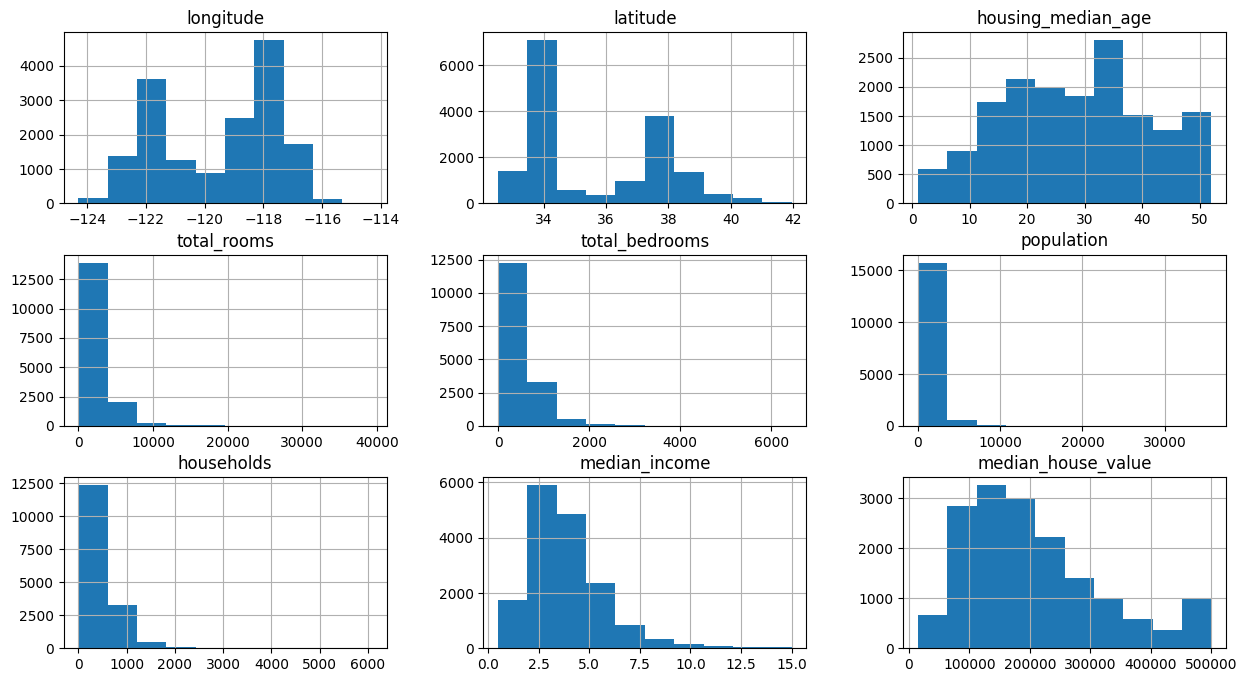

In [ ]:
from sklearn.model_selection import train_test_split

df.dropna(inplace=True)

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
train_df = X_train.join(y_train)
train_df

train_df.hist(figsize=(15,8)) #show histogram


In [ ]:
import numpy as np

X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)


0.8137121447334693

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#Checking to see impact of changing max_features
param_grid = {
    "max_features": [2, 6, 10],
}

gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gridSearch.fit(X_train, y_train)
bf1 = gridSearch.best_estimator_
bf1

RandomForestRegressor(max_features=6)

In [ ]:
bf1.score(X_test, y_test)

0.8179604251951605

In [ ]:
#Checking to see impact of changing min_samples_split
param_grid = {
    "max_features": [6],
    "min_samples_split": [2, 3, 4]
}

gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gridSearch.fit(X_train, y_train)
bf2 = gridSearch.best_estimator_
bf2

RandomForestRegressor(max_features=6)

In [ ]:
bf2.score(X_test, y_test)

0.8185189491851134

In [ ]:
#Checking to see impact of changing min_samples_leaf
param_grid = {
    "max_features": [6],
    "min_samples_leaf": [1, 2, 6]
}

gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gridSearch.fit(X_train, y_train)
bf3 = gridSearch.best_estimator_
bf3

RandomForestRegressor(max_features=6, min_samples_leaf=2)

In [ ]:
bf3.score(X_test, y_test)

0.8173640886058577

In [ ]:
#Checking to see impact of changing max_depth
param_grid = {
    "max_features": [6],
    "min_samples_leaf": [2],
    "max_depth": [None, 2, 6]
}

gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gridSearch.fit(X_train, y_train)
bf4 = gridSearch.best_estimator_
bf4

RandomForestRegressor(max_features=6, min_samples_leaf=2)

In [ ]:
bf4.score(X_test, y_test)

0.8152616694068757

In [ ]:
#Checking to see impact of changing bootstrap
param_grid = {
    "max_features": [6],
    "min_samples_leaf": [2],
    "bootstrap": [True, False]
}

gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gridSearch.fit(X_train, y_train)
bf5 = gridSearch.best_estimator_
bf5

RandomForestRegressor(max_features=6, min_samples_leaf=2)

In [ ]:
bf5.score(X_test, y_test)

0.8157488901469758

In [ ]:
#Checking to see impact of changing n_estimators
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_leaf": [2],
    "max_features": [6]
}

gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gridSearch.fit(X_train, y_train)
bf6 = gridSearch.best_estimator_
bf6


RandomForestRegressor(max_features=6, min_samples_leaf=2, n_estimators=300)

In [ ]:
bf6.score(X_test, y_test)

0.8185602328011979

In [ ]:
y_pred = bf6.predict(X_test)
y_pred_og = forest.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

2433910227.231485

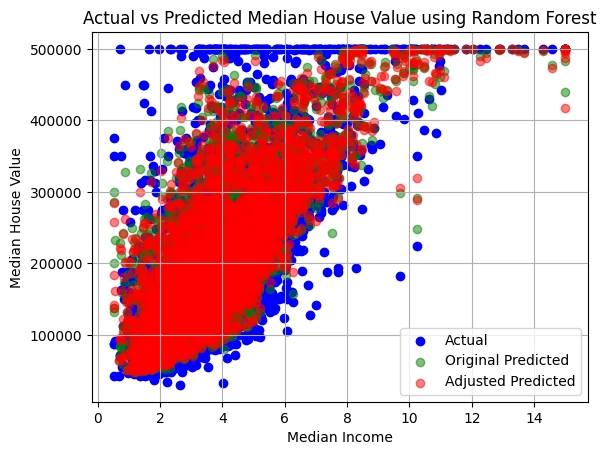

In [ ]:
import matplotlib.pyplot as plt

# Select the 'median_income' feature for plotting
X_median_income_test = X_test['median_income']

# Plot the actual vs predicted values
plt.scatter(X_median_income_test, y_test, color='blue', label='Actual')
plt.scatter(X_median_income_test, y_pred_og, color='green', alpha=0.5, label='Original Predicted')
plt.scatter(X_median_income_test, y_pred, color='red', alpha=0.5, label='Adjusted Predicted')
plt.title('Actual vs Predicted Median House Value using Random Forest')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()